# Twitter Data Collection & Analysis

In this lesson, we're going to learn how to analyze and explore Twitter data with the Python/command line tool [twarc](https://twarc-project.readthedocs.io/en/latest/). We're specifically going to work with [twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2/), which is designed for version 2 of the Twitter API (released in 2020) and the Academic Research track of the Twitter API (released in 2021), which enables researchers to collect tweets from the entire Twitter archive for free.

Twarc was developed by a project called [Documenting the Now](https://www.docnow.io/). The DocNow team develops tools and ethical frameworks for social media research.

## Dataset

<div align="center">
  <img src="../../images/Beijing2022.png" alt="Logo" width="700" height="500">
  <br />
  <em>Fig 4. Mocking of the official Olympic Games 2022 logo.</em>
</div>



The Twitter conversation that we're going to explore in this module is related to the current Olympic Winter Games, held in Beijing, China. The 2022 Beijing Winter Olympics have been subject of debate due to reported human rights violations by the Chinese government. More specifically, human rights groups are calling Beijing out over anti-democratic suppression of dissent in Taiwan, Hong Kong and the largely Muslim Uyghur population in the Chinese Xinjiang region.

Many countries officially subscribe to this critique, and are partly boycotting the Olympic Games, for instance by withdrawing diplomats. And altough some lower income countries are said to be too economically dependent on China to join the public display of disaproval, some have joined the protests:

> *"The last-minute boycott, which will see India's top envoy in Beijing sit out Friday's Opening Ceremony, adds the world's most populous democracy to a list of Western nations who already have launched their own diplomatic no-shows, citing China's human rights record -- setting the tone for a controversial Olympic Games".
Source: [CNN](https://edition.cnn.com/2022/02/03/china/india-diplomatic-boycott-beijing-olympics-intl-hnk/index.html)*

The boycott was getting traction on social media platforms like Twitter in the run-up to the opening ceremony of the Olympics on Friday February 4th. Various celebrities are outspoken and advocating the boycott on the 2022 Winter Olympics. According to results of an online survey by the Vancouver, B.C.-based consultancy Research Co., 47 per cent of 1,000 respondents across Canada say they will make a conscious effort to refrain from watching the sporting events — up two points from results from a similar survey conducted in December 2021. Fifty-nine per cent of respondents say they think Canada should boycott the Games over China's human rights record. *Source: [CBC News](https://www.cbc.ca/news/canada/british-columbia/beijing-winter-olympic-games-boycott-research-co-survey-1.6339061)*.

> *"There is no reason to watch a Winter Olympics that is holding up and spreading propaganda for a regime that is committing actual genocide and ethnic cleansing".
Source: [Meghan McCain, Twitter](https://twitter.com/MeghanMcCain/status/1489622712037294080?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1489622712037294080%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fpeople.com%2Fpolitics%2Fbeijing-olympics-2022-meghan-mccain-will-not-watch%2F)*

This raises many questions: what is the role of social media in the spread of the protests? Who are these activists? Where are they from? How often do they tweet? Is it fuelled by a small group of influential individuals, or is a decentralized web?

We're going to retrieve these tweets to explore the multifaceted conservation around the hashtag **#GenocideGames**.

## Search Queries & Privacy Concerns

To collect tweets from the Twitter API, we need to make queries, or requests for specific kinds of tweets — e.g., `twarc2 search *query*`. The simplest kind of query is a keyword search, such as the phrase "I will not watch," which should return any tweet that contains all of these words in any order — `twarc2 search "#GenocideGames"`.

There are many other operators that we can add to a query, which would allow us to collect tweets only from specific Twitter users or locations, or to only collect tweets that meet certain conditions, such as containing an image or being authored by a verified Twitter user. Here's an excerpted table of search operators taken from [Twitter's documentation](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list) about how to build a search query. There are many other operators beyond those included in this table, and I recommend reading through [Twitter's entire web page on this subject](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list).


| Search Operator             | Explanation                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:--------------------:|:----------------------------------------------------------------------------------------------:|
| keyword              | Matches a keyword within the body of a Tweet. `so sweet and so cold`                                                                                          
| "exact phrase match" | Matches the exact phrase within the body of a Tweet. `"so sweet and so cold" OR "plums in the icebox"`                                                                                              |
| - | Do NOT match a keyword or operator `baldwin -alec`, `walt whitman -bridge`                                                                                              |
| #                    | Matches any Tweet containing a recognized hashtag `#arthistory`        |                                                                             |
| from:, to:                | Matches any Tweet from or to a specific user. `from:KingJames` `to:KingJames`                                                                    |                                                                                                            |
| place:               | Matches Tweets tagged with the specified location or Twitter place ID. `place:"new york city" OR place:seattle`                                                                                            |
| is:reply, is:quote             | Returns only replies or quote tweets. `DFW bro is:reply` `David Foster Wallace bro is:quote`                                                                                                                               |
| is:verified          | Returns only Tweets whose authors are verified by Twitter.`DFW bro is:verified`                                                                                                                                |
| has:media           | Matches Tweets that contain a media object, such as a photo, GIF, or video, as determined by Twitter. `I Think You Should Leave has:media`                                                                                                                                |
| has:images, has:videos           | Matches Tweets that contain a recognized URL to an image. `i'm gonna tell my kinds that this was has:images`                                                                                    |
| has:geo              | Matches Tweets that have Tweet-specific geolocation data provided by the Twitter user.  `pyramids has:geo`              

As I discussed in ["Users’ Data: Legal & Ethical Considerations,"](01-User-Ethics-Legal-Concerns) collecting publicly available tweets is legal, but it still raises a lot of privacy concerns and ethical quandaries — particularly when you re-publish users' data, as we are in this lesson. To reduce potential harm to Twitter users when re-publishing or citing tweets, it can be helpful to ask for explicit permission from the authors or to focus on tweets that have already been reasonably exposed to the public (e.g., tweets with many retweets or tweets from verified users), such that re-publishing the content will not unduly increase risk to the user.
               

## Install and Import Libraries

Because twarc relies on Twitter's API, we need to apply for a Twitter developer account and create a Twitter application before we can use it, which you likely did already in the previous step. If not, you can find the instructions for the application process under "Twitter API Set Up."

To make an interactive plot later on, we're also going to install the package plotly.

In [12]:
!pip install pandas
!pip install matplotlib

Then we're going to import plotly as well as pandas

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 400
pd.options.display.max_columns = 90

import matplotlib.pyplot as plt



## Get Tweet Counts

The first thing we're going to do is retrieve "tweet counts" — that is, retrieve the number of tweets that included the term "GenocideGames" each day in Twitter's history.

The [tweet counts API endpoint](https://twittercommunity.com/t/introducing-new-tweet-counts-endpoints-to-the-twitter-api-v2/155997) is a convenient feature of the v2 API (first introduced in 2021) that allows us to get a sense of how many tweets will be returned for a given query before we actually collect all the tweets that match the query. We won't get the text of the tweets or the users who tweeted the tweets or any other relevant data. We will simply get the number of tweets that match the query. This is helpful because we might be able to see that the search query "I will not watch" matches too many tweets, which would encourage us to narrow our search by modifying the query. 

The tweet counts API endpoint is perhaps even more useful for research projects that are primarily interested in tracking the volume of a Twitter conversation over time. In this case, tweet counts enable a researcher to retrieve this information in a way that's faster and easier than retrieving all tweets and relevant metadata.

To get tweet counts from Twitter with twarc2, we will use [`twarc2 counts`](https://twarc-project.readthedocs.io/en/latest/twarc2/#counts) followed by a search query. We will also use the flag `--csv` because we want to output the data as a CSV and the flag `--granularity day` to get tweet counts per day (other options include `hour` and `minute` — you can see more in [twarc's documentation](https://twarc-project.readthedocs.io/en/latest/twarc2/#counts)). Finally, we write the data to a CSV file.
With this query, the API will count all tweets containing the search query per day of the last week and store it in a CSV file. Unfortunately, we don't have access to the full archive (more than one week) of twitter. However, if you would apply for an Academic Research permit of the Twitter API, you could use the flag `--archive` to gain access to the full archive of Twitter. 

In [13]:
!twarc2 counts "GenocideGames" --csv --granularity day > ../../data/raw/tweet-counts.csv

As you can see we stored the CSV file in the map `../../data/raw/`, you can find this map in the Binder folders in the (if expanded) left panel. Just go up two maps and doubeclick the map _data_ and then _raw_. The path specified here with the dots is a so-called relative path, which means it stores the information relative to the location of the script that we are running. The two dots `..` indicate that the folder above this map should be opened (because the map _data_ is in the main folder, two maps up).

We can read in this CSV file with pandas, parse the date columns, and sort from earliest to latest.

In [14]:
# Code borrowed from Ed Summers
# https://github.com/edsu/notebooks/blob/master/Black%20Lives%20Matter%20Counts.ipynb

# Read in CSV as DataFrame
tweet_counts_df = pd.read_csv('../../data/raw/tweet-counts.csv', parse_dates=['start', 'end'])
# Sort values theby earliest date
tweet_counts_df = tweet_counts_df.sort_values('start')

Then we can make a quick plot of tweets per day with [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

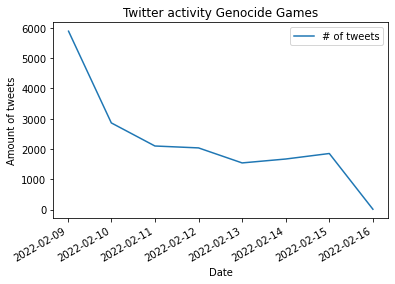

In [15]:
# Make a line plot from the DataFrame and specify x and y axes, axes titles, and plot title
tweet_counts_df.plot('start', 'day_count', label='# of tweets', xlabel = 'Date', ylabel = 'Amount of tweets', title='Twitter activity Genocide Games');

</br>

## Get Tweets (Standard Track)

To actually collect tweets and their associated metadata, we can use the command `twarc2 search` and insert a query.

Here we're going to search for any tweets that mention the words "GenocideGames" and were tweeted by verified accounts *in the past week*. By default, `twarc2 search` will use the standard track of the Twitter API, which only collects tweets from the past week.

`!twarc2 search "GenocideGames"`

If we would use the command above, the tweets and tweet metadata above would be printed to the notebook. But we want to save this information to a file so we can work with it.

To output Twitter data to a file, we can also include a filename with the ".jsonl" file extension, which stands for JSON lines. This is a specific type of format that can store the scraped tweets well. It is not necessary to understand why this format is used (except if you are curious ofcourse, then go for it!).

**NOTE: This following code will scrape around 10000 tweets from twitter, this will use up some of your twitterscraping limit, so use it only once and save the output also locally on your computer. If you want to work with it again, you can just upload it under ../../data/etc.**

In [6]:
!twarc2 search "GenocideGames" ../../data/raw/boycott_last_week.jsonl

100%|███████████████| Processed 6 days/6 days [04:16<00:00, 16350 tweets total ]


## Convert JSONL to CSV

To make our Twitter data easier to work with, we can convert our JSONL file to a CSV file with the [`twarc-csv`](https://pypi.org/project/twarc-csv/) plugin, which needs to be installed separately.

In [16]:
!pip install twarc-csv

Once installed, we can use the plug-in from twarc2 with the input filename for the JSONL and a desired output filename for the CSV file.

In [8]:
!twarc2 csv ../../data/raw/boycott_last_week.jsonl ../../data/raw/boycott_last_week.csv

100%|██████████████| Processed 47.7M/47.7M of input file [00:11<00:00, 4.34MB/s]

ℹ️
Parsed 16350 tweets objects from 181 lines in the input file.
Wrote 16350 rows and output 74 columns in the CSV.



## Read in CSV

Now we're ready to explore the data!

To work with our tweet data, we can read in our CSV file with pandas and again parse the date column.

In [9]:
tweets_df = pd.read_csv('../../data/raw/boycott_last_week.csv',
                        parse_dates = ['created_at'])

/home/misha/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


If we scroll through this dataset, we can see that there is a *lot* of metadata associated with each tweet. Scroll to the right to see all the information. What category surprises you the most?

In [18]:
tweets_df.head()

id      conversation_id  referenced_tweets.replied_to.id  \
0  1493736406778138633  1493062939384946689                     1.493063e+18   
1  1493736072588800004  1493736072588800004                              NaN   
2  1493735865314525184  1493735865314525184                              NaN   
3  1493735234411679745  1493735234411679745                              NaN   
4  1493735022972612608  1493735022972612608                              NaN   

   referenced_tweets.retweeted.id  referenced_tweets.quoted.id  \
0                             NaN                          NaN   
1                    1.493688e+18                          NaN   
2                    1.493688e+18                          NaN   
3                    1.493611e+18                          NaN   
4                    1.489202e+18                          NaN   

             author_id  in_reply_to_user_id  retweeted_user_id  \
0            471601797         1.060752e+09                NaN   
1  1491893455500546050                  NaN       4.467256e+07   
2   751578677859811328                  NaN       4.467256e+07   
3  1482116086304755712                  NaN       1.492892e+18   
4   829465923962564608                  NaN       1.291344e+18   

   quoted_user_id                created_at  \
0             NaN 2022-02-15 23:58:06+00:00   
1             NaN 2022-02-15 23:56:46+00:00   
2             NaN 2022-02-15 23:55:57+00:00   
3             NaN 2022-02-15 23:53:26+00:00   
4             NaN 2022-02-15 23:52:36+00:00   

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                                                                                                        @CBCOlympics #GenocideGames   
1                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
2                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
3                                In December 2021, a series of air attacks led to the deaths of 28 civilians in a market place in Alamata, southern Tigray. Open-source investigators believe China was the original source for Ethiopia's Wing Loong drones. #GenocideGames #BoycottBeijingOlympics #TigrayGenocide   
4  Thrilled to announce that SUG are hosting a panel with human rights defenders @nathanlawkc, @chemilhamoooo, @MahmutRahima and @MichaelPolakLaw. Together, we'll reflect on what the #GenocideGames means for communities persecuted by the CCP. \n\nSign up here: https://t.co/aDLqhilzWz https://t.co/8O1z8NfdH4   

  lang               source  public_metrics.like_count  \
0  und  Twitter for Android                          0   
1   en  Twitter for Android                         19   
2   en   Twitter for iPhone                         19   
3   en   Twitter for iPhone                         94   
4   en      Twitter Web App                         84   

   public_metrics.quote_count  public_metrics.reply_count  \
0                           0                           0   
1                           0                           8   
2                           0                           8

If we ask for a list of all the columns in the DataFrame, we can see that there are more than 90 columns here!

In [17]:
tweets_df.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'retweeted_user_id',
       'quoted_user_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'public_metrics.retweet_count',
       'reply_settings', 'possibly_sensitive', 'withheld.scope',
       'withheld.copyright', 'withheld.country_codes', 'entities.annotations',
       'entities.cashtags', 'entities.hashtags', 'entities.mentions',
       'entities.urls', 'context_annotations', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author

As you experiment with the query syntax provided by the Twitter API you should make a habit of scanning through your collected Twitter data to ensure that your API query and subsequent manipulations are returning the data that you expect and want. If you notice tweets you don't expect return to examine your query to see if you can explain why those tweets are turning up. If you can't find an adequate explanation you might want to ask in the [Twitter Community Forum](https://twittercommunity.com).

## Extract Tweet and Media URLs

We can make some Python functions that will create a tweet URL based on each tweet's unique ID as well as extract an image URL if one exists.

In [19]:
# Make Tweet URL
def make_tweet_url(tweets):
    # Get username
    username = tweets[0]
    # Get tweet ID
    tweet_id = tweets[1]
    # Make tweet URL
    tweet_url = f"https://twitter.com/{username}/status/{tweet_id}"
    return tweet_url

# Extract Image URL
from ast import literal_eval
def get_image_url(media):
    # if not NaN or {}
    if type(media) != float and media != '{}':
        # Convert to an actual Python list, not just a string
        media =  literal_eval(media)
        media = media[0]
         # Extract media url if it exists
        if 'url' in media.keys():
            return media['url']
    else:
        return "No Image URL"

Here we apply the above Python functions to the relevant columns to create new columns.

In [20]:
tweets_df['tweet_url'] = tweets_df[['author.username', 'id']].apply(make_tweet_url, axis='columns')
tweets_df['media'] = tweets_df['attachments.media'].apply(get_image_url)

## Rename and Select Columns

To make the data more readable, we're going to rename a number of columns.

In [21]:
tweets_df.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio'},
                            inplace=True)

Then we're only going to select the columns that we're interested. Depending on your project and research question, you should change and customize these categories.

In [22]:
tweets_df = tweets_df[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'tweet_url', 'media', 'user_bio']]

Now we can view our more focused DataFrame!

In [23]:
tweets_df.head()

date         username               name  verified  \
0 2022-02-15 23:58:06+00:00          cco8226               RJ T     False   
1 2022-02-15 23:56:46+00:00  FoundngAttitude  Founding Attitude     False   
2 2022-02-15 23:55:57+00:00          FX2trot       DreamFox 🦊🤍🔮     False   
3 2022-02-15 23:53:26+00:00           F2B542                F2B     False   
4 2022-02-15 23:52:36+00:00    erisa86848966            不信青史姓共產     False   

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                                                                                                        @CBCOlympics #GenocideGames   
1                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
2                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
3                                In December 2021, a series of air attacks led to the deaths of 28 civilians in a market place in Alamata, southern Tigray. Open-source investigators believe China was the original source for Ethiopia's Wing Loong drones. #GenocideGames #BoycottBeijingOlympics #TigrayGenocide   
4  Thrilled to announce that SUG are hosting a panel with human rights defenders @nathanlawkc, @chemilhamoooo, @MahmutRahima and @MichaelPolakLaw. Together, we'll reflect on what the #GenocideGames means for communities persecuted by the CCP. \n\nSign up here: https://t.co/aDLqhilzWz https://t.co/8O1z8NfdH4   

   retweets  likes  replies  quotes  \
0         0      0        0       0   
1        44     19        8       0   
2        44     19        8       0   
3       148     94        0       1   
4        51     84        1       5   

                                                        tweet_url  \
0          https://twitter.com/cco8226/status/1493736406778138633   
1  https://twitter.com/FoundngAttitude/status/1493736072588800004   
2          https://twitter.com/FX2trot/status/1493735865314525184   
3           https://twitter.com/F2B542/status/1493735234411679745   
4    https://twitter.com/erisa86848966/status/1493735022972612608   

          media  \
0  No Image URL   
1          None   
2          None   
3  No Image URL   
4          None   

                                                                                                                                                          user_bio  
0      Retired firefighter/paramedic IAFF(Ret'd), exercise is key to good mental health, workout addict, self def instructor, camaro owner #TrudeauworstPMever 💉💉🚫  
1  The Founding Attitude fights for freedom against all odds, and all comers. Our Founders were out manned, out matched, and out gunned. Yet they fought, and won.  
2                                                           I’m following the cosmic journey of my soul.🔮❤️🇺🇸 🇵🇱 🇫🇷 Independent Mind ... Thinking is a Commodity 💭  
3                                                                                                                                                              NaN  
4                              不讀中國歷史，不知道中國文化博大精深；不讀世界歷史，不知道中國制度腐敗落後……因為反共而反中國文化的，不必跟我……\n說自己想說的話

## Sort By Top Retweets

We can sort by number of retweets to see the most circulated tweets. Let's examine the top 5. Does the most retweeted tweet contain an impactful message or does it suprise you that this is the most retweeted tweet? Who posted this tweet? 

In [24]:
tweets_df.sort_values(by='retweets', ascending=False)[:5]

date      username                 name  verified  \
1940  2022-02-14 22:12:07+00:00        Abj007  Rohan #1ABjrFanChgo     False   
10497 2022-02-10 03:53:41+00:00  eros_nemesis         #FactCheckUK     False   
15996 2022-02-09 01:10:42+00:00  HeartGoesOn2          HeartGoesOn     False   
10651 2022-02-10 02:13:37+00:00   1UncleSalty           UncleSalty     False   
12858 2022-02-09 14:58:19+00:00     SarraXkcd    Scared money.....     False   

                                                                                                                                                                                                                                                                                                                          text  \
1940   Truly touched by China’s dedication to @WIONews.Their top “diplomat” has blocked me &amp; my channel but evidently not only watches our reports,shares them too.Waiting for the day when he shares #Gravitas reports on the #WuhanVirus, #GenocideGames &amp; #PengShuai.Will keep you posted 😬 https://t.co/MlIl6naTfY   
10497                                                                                CBC, broadcaster of the Olympics, is reporting that nearly half of Canadians, 49%, say they will not watch the Olympics. That’s terrific! And let the sponsors know. #IWillNotWatch #GenocideGames #GamesofShame  https://t.co/OK8zXuxH2P   
15996                                                                                CBC, broadcaster of the Olympics, is reporting that nearly half of Canadians, 49%, say they will not watch the Olympics. That’s terrific! And let the sponsors know. #IWillNotWatch #GenocideGames #GamesofShame  https://t.co/OK8zXuxH2P   
10651                                                                                CBC, broadcaster of the Olympics, is reporting that nearly half of Canadians, 49%, say they will not watch the Olympics. That’s terrific! And let the sponsors know. #IWillNotWatch #GenocideGames #GamesofShame  https://t.co/OK8zXuxH2P   
12858                                                                                CBC, broadcaster of the Olympics, is reporting that nearly half of Canadians, 49%, say they will not watch the Olympics. That’s terrific! And let the sponsors know. #IWillNotWatch #GenocideGames #GamesofShame  https://t.co/OK8zXuxH2P   

       retweets  likes  replies  quotes  \
1940       2036  10561      309      96   
10497       728   2460      383     119   
15996       728   2460      383     119   
10651       728   2460      383     119   
12858       728   2460      383     119   

                                                         tweet_url  \
1940         https://twitter.com/Abj007/status/1493347346243072000   
10497  https://twitter.com/eros_nemesis/status/1491621366868627457   
15996  https://twitter.com/HeartGoesOn2/status/1491217962925432835   
10651   https://twitter.com/1UncleSalty/status/1491596186146545669   
12858     https://twitter.com/SarraXkcd/status/1491426240066363393   

              media  \
1940           None   
10497  No Image URL   
15996  No Image URL   
10651  No Image URL   
12858  No Image URL   

                                                                                                                                                             user_bio  
1940   Biggst fan of Abhishek,Aish & BigB-Chgo.Watchd KNK 23x wishng AB&Aish wld unite. Dreams do com true! Met ABj 8/22/12, Followed by AB 8/13/17 & BigB on 6/17/18  
10497        Orbis non sufficit. Enjoy and collect whisky & wine. Golf. I block all bullshitters, illiterates and stable weirdos. Life is too short. Nil desperandum!  
15996                                                                                                                                                             NaN  
10651                                                                                                    Exposer of fraudu

</br>

## Sort By Date

We can sort from the earliest tweets to the latest tweets. Let's examine the latest 5 tweets.

In [25]:
tweets_df.sort_values(by='date', ascending=False)[:5]

date         username               name  verified  \
0 2022-02-15 23:58:06+00:00          cco8226               RJ T     False   
1 2022-02-15 23:56:46+00:00  FoundngAttitude  Founding Attitude     False   
2 2022-02-15 23:55:57+00:00          FX2trot       DreamFox 🦊🤍🔮     False   
3 2022-02-15 23:53:26+00:00           F2B542                F2B     False   
4 2022-02-15 23:52:36+00:00    erisa86848966            不信青史姓共產     False   

                                                                                                                                                                                                                                                                                                                text  \
0                                                                                                                                                                                                                                                                                        @CBCOlympics #GenocideGames   
1                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
2                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
3                                In December 2021, a series of air attacks led to the deaths of 28 civilians in a market place in Alamata, southern Tigray. Open-source investigators believe China was the original source for Ethiopia's Wing Loong drones. #GenocideGames #BoycottBeijingOlympics #TigrayGenocide   
4  Thrilled to announce that SUG are hosting a panel with human rights defenders @nathanlawkc, @chemilhamoooo, @MahmutRahima and @MichaelPolakLaw. Together, we'll reflect on what the #GenocideGames means for communities persecuted by the CCP. \n\nSign up here: https://t.co/aDLqhilzWz https://t.co/8O1z8NfdH4   

   retweets  likes  replies  quotes  \
0         0      0        0       0   
1        44     19        8       0   
2        44     19        8       0   
3       148     94        0       1   
4        51     84        1       5   

                                                        tweet_url  \
0          https://twitter.com/cco8226/status/1493736406778138633   
1  https://twitter.com/FoundngAttitude/status/1493736072588800004   
2          https://twitter.com/FX2trot/status/1493735865314525184   
3           https://twitter.com/F2B542/status/1493735234411679745   
4    https://twitter.com/erisa86848966/status/1493735022972612608   

          media  \
0  No Image URL   
1          None   
2          None   
3  No Image URL   
4          None   

                                                                                                                                                          user_bio  
0      Retired firefighter/paramedic IAFF(Ret'd), exercise is key to good mental health, workout addict, self def instructor, camaro owner #TrudeauworstPMever 💉💉🚫  
1  The Founding Attitude fights for freedom against all odds, and all comers. Our Founders were out manned, out matched, and out gunned. Yet they fought, and won.  
2                                                           I’m following the cosmic journey of my soul.🔮❤️🇺🇸 🇵🇱 🇫🇷 Independent Mind ... Thinking is a Commodity 💭  
3                                                                                                                                                              NaN  
4                              不讀中國歷史，不知道中國文化博大精深；不讀世界歷史，不知道中國制度腐敗落後……因為反共而反中國文化的，不必跟我……\n說自己想說的話

</br>

## Plot Tweets Over Time

In [26]:
tweets_df = tweets_df.set_index('date')
tweets_df.head()

username               name  verified  \
date                                                                      
2022-02-15 23:58:06+00:00          cco8226               RJ T     False   
2022-02-15 23:56:46+00:00  FoundngAttitude  Founding Attitude     False   
2022-02-15 23:55:57+00:00          FX2trot       DreamFox 🦊🤍🔮     False   
2022-02-15 23:53:26+00:00           F2B542                F2B     False   
2022-02-15 23:52:36+00:00    erisa86848966            不信青史姓共產     False   

                                                                                                                                                                                                                                                                                                                                        text  \
date                                                                                                                                                                                                                                                                                                                                           
2022-02-15 23:58:06+00:00                                                                                                                                                                                                                                                                                        @CBCOlympics #GenocideGames   
2022-02-15 23:56:46+00:00                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
2022-02-15 23:55:57+00:00                                                                                                             Like Second-hand Smoke?\nRussian says her positive doping test was due to grandfather's medication \n\n#OlympicGames \n#GenocideGames \n#giVeUsAbReAk\nhttps://t.co/1fshlZxI1P https://t.co/xV6iOlWAyM   
2022-02-15 23:53:26+00:00                                In December 2021, a series of air attacks led to the deaths of 28 civilians in a market place in Alamata, southern Tigray. Open-source investigators believe China was the original source for Ethiopia's Wing Loong drones. #GenocideGames #BoycottBeijingOlympics #TigrayGenocide   
2022-02-15 23:52:36+00:00  Thrilled to announce that SUG are hosting a panel with human rights defenders @nathanlawkc, @chemilhamoooo, @MahmutRahima and @MichaelPolakLaw. Together, we'll reflect on what the #GenocideGames means for communities persecuted by the CCP. \n\nSign up here: https://t.co/aDLqhilzWz https://t.co/8O1z8NfdH4   

                           retweets  likes  replies  quotes  \
date                                                          
2022-02-15 23:58:06+00:00         0      0        0       0   
2022-02-15 23:56:46+00:00        44     19        8       0   
2022-02-15 23:55:57+00:00        44     19        8       0   
2022-02-15 23:53:26+00:00       148     94        0       1   
2022-02-15 23:52:36+00:00        51     84        1       5   

                                                                                tweet_url  \
date                                                                                        
2022-02-15 23:58:06+00:00          https://twitter.com/cco8226/status/1493736406778138633   
2022-02-15 23:56:46+00:00  https://twitter.com/FoundngAttitude/status/1493736072588800004   
2022-02-15 23:55:57+00:00          https://twitter.com/FX2trot/status/1493735865314525184   
2022-02-15 23:53:26+00:00           https://twitter.com/F2B542/status/1493735234411679745   
2022-02-15 23:52:36+00:00    https://twitter.com/erisa86848966/status/1493735022972612608   

                                  media  \
date              

## Display Links and Images in Twitter Data

To display links and images in our DataFrame, we can convert the image URL into an HTML image tag, and we can display our DataFrame as an HTML object with the `HTML` module.

In [32]:
from IPython.core.display import HTML

def get_image_html(link):
    # check to see if the media category has an image URL
    if link != "No Image URL":
        # format the image url as an HTML image
        image_html = f"<a href='{link}'>'<img src='{link}' width='500px'></a>                            "
        return image_html
    else:
        return "No Image URL"
# Apply the above function to the media column
tweets_df['media']= tweets_df['media'].apply(get_image_html)

View the images, you might need to scroll a bit before finding a tweet containing an image. The standard image-icon means that no image was attached to the tweet.

In [36]:
HTML(tweets_df[['media', 'text']].head(100).sort_values(by='media').to_html(render_links=True, escape=False))

View tweet links

In [37]:
HTML(tweets_df[['tweet_url', 'text', 'retweets']].head(100).sort_values(by='retweets', ascending=False).to_html(render_links=True, escape=False))

## Top Hashtags

To analyze hashtags in a tweet dataset, we can use the plugin [`twarc2 hashtags`](https://pypi.org/project/twarc-hashtags/), which requires a separate installation.

In [38]:
!pip install twarc-hashtags

  Created wheel for twarc-hashtags: filename=twarc_hashtags-0.0.5-py3-none-any.whl size=4165 sha256=193ed2016ef3737a49d952023c4d7f194f5de84601f1442dbe575d761b2a82f6
  Stored in directory: /home/misha/.cache/pip/wheels/9c/6b/23/da03160fd28d79bb114af5bc26d8d7e459ff6f316910bf461f
Successfully built twarc-hashtags


Then we can create a CSV digest of the top hashtags from our JSONL data with `twarc2 hashtags`. Of course, our search term itself is already based on a hashtag (#GenocideGames), but you can imagine that with another topic, such as the Black Lives Matter movement, you search for the words "Black Lives Matter" and you would perhaps be interested in the hashtags that are associated with this topic. In our case it is interesting to see which other hashtags are also associated with the Olympic Games boycott.

In [39]:
!twarc2 hashtags ../../data/raw/boycott_last_week.jsonl ../../data/raw/boycott_hashtags.csv

100%|██████████████| Processed 47.7M/47.7M of input file [00:03<00:00, 15.0MB/s]


In [54]:
pd.read_csv('../../data/raw/boycott_hashtags.csv')

hashtag  tweets
0          genocidegames    7174
1         tigraygenocide    3509
2                 tigray    1993
3         isaiasafewerki    1006
4                  china     818
...                  ...     ...
1357  2022beijingolympic       1
1358        1936olympics       1
1359          12febbraio       1
1360       100daysofcode       1
1361       1000lbsisters       1

[1362 rows x 2 columns]

We can also use the flag `--group` to group the hashtags by their frequency per time period and the flag `--limit` to limit the hashtags to only the top *n* number of hashtags per grouping.

In [55]:
!twarc2 hashtags --group day --limit 10 ../../data/raw/boycott_last_week.jsonl ../../data/raw/boycott_hashtags_day.csv

100%|██████████████| Processed 47.7M/47.7M of input file [00:02<00:00, 17.1MB/s]


In [79]:
hashtags_df = pd.read_csv('../../data/raw/boycott_hashtags_day.csv')
hashtags_df

hashtag        time  tweets
0            genocidegames  2022-02-15     654
1           tigraygenocide  2022-02-15     296
2                   tigray  2022-02-15     171
3   boycottbeijingolympics  2022-02-15      91
4          norightsnogames  2022-02-15      86
..                     ...         ...     ...
78           ravensaunders  2022-02-09     134
79  boycottbeijingolympics  2022-02-09     119
80        genocideolympics  2022-02-09     117
81         norightsnogames  2022-02-09     111
82      boycottbeijing2022  2022-02-09      94

[83 rows x 3 columns]

To plot the frequency of hashtags over time, we can set the DataFrame index to the "time" column.

In [80]:
hashtags_df = hashtags_df.set_index('time')

Then we can filter for a specific hashtag (in this case we will take the second largest hashtag (at the time of writing): #TigrayGenocide) and plot its frequency.

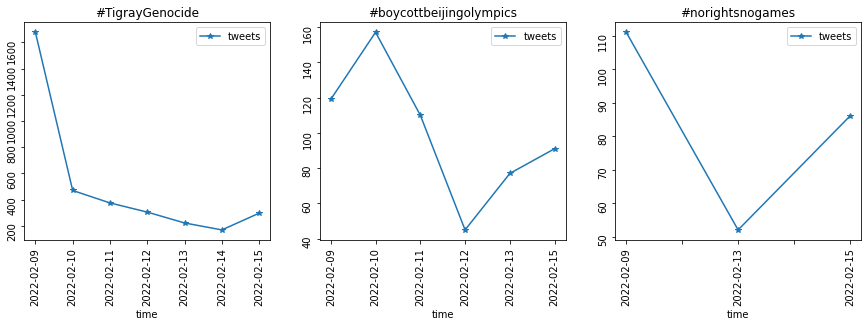

In [132]:
#hashtags_df = hashtags_df[::-1]
fig, axes = plt.subplots(1, 3, figsize=(15,4))

hashtags_df[hashtags_df['hashtag'] == 'tigraygenocide'].plot(y='tweets', title='#TigrayGenocide',ax=axes[0],marker="*").invert_xaxis();

hashtags_df[hashtags_df['hashtag'] == 'boycottbeijingolympics'].plot(y='tweets', title='#boycottbeijingolympics',ax=axes[1],marker="*").invert_xaxis();

hashtags_df[hashtags_df['hashtag'] == 'norightsnogames'].plot(y='tweets', title='#norightsnogames',ax=axes[2],marker="*").invert_xaxis();
    
for ax in fig.axes:
    ax.tick_params(labelrotation=90)

